# Tutorial 24: Hierarchical Risk Parity (HRP) Portfolio Optimization

### 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1367%,-0.7308%,-0.1449%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0216%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


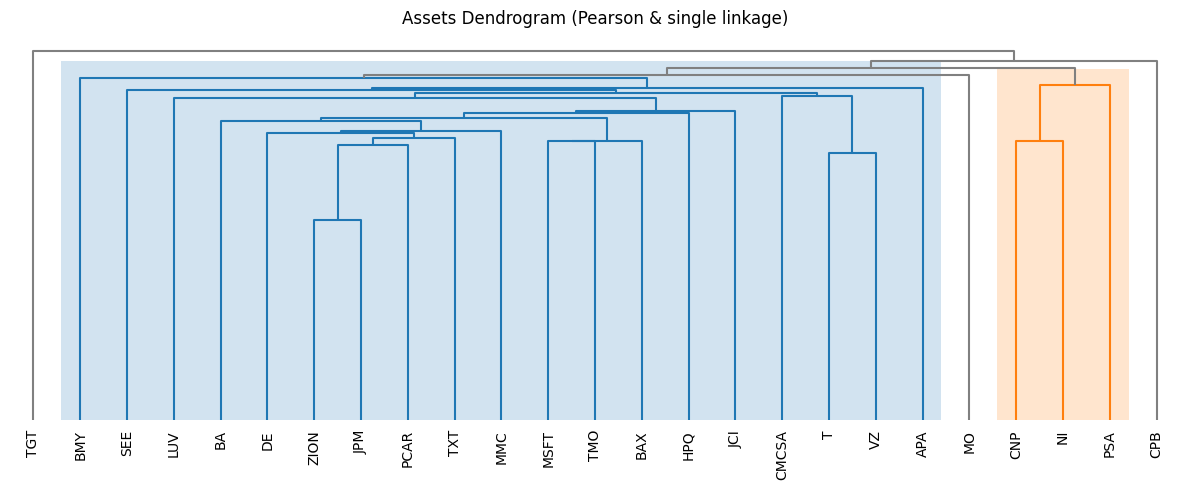

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

위의 내용은 HRP(Hierarchical Risk Parity) 포트폴리오 구성 방법과 클러스터링의 관계에 대한 설명입니다. 이를 더 자세히 설명하겠습니다.

### 덴드로그램과 클러스터링

**덴드로그램**은 계층적 클러스터링(hierarchical clustering) 결과를 시각화하는 도구입니다. 데이터 포인트가 계층적으로 그룹화되는 과정을 보여주며, 각 단계에서 두 개의 클러스터가 결합됩니다. 덴드로그램을 통해 데이터가 어떻게 구조화되어 있는지를 시각적으로 이해할 수 있습니다.

- **클러스터 수 선택**: 덴드로그램을 사용하여 최적의 클러스터 수를 결정할 수 있습니다. 덴드로그램의 특정 높이에서 수평선을 그려 몇 개의 클러스터로 데이터를 나눌지 결정할 수 있습니다. 예를 들어, 덴드로그램의 특정 높이에서 네 개의 클러스터가 형성된다면, 이는 데이터가 네 개의 주요 그룹으로 나뉜다는 것을 시사합니다.

### HRP 포트폴리오 구성

**HRP(Hierarchical Risk Parity)** 포트폴리오는 전통적인 클러스터링 방법과 다르게 작동합니다. HRP는 자산 간의 상관 관계를 이용하여 포트폴리오를 구성하며, 계층적 구조를 사용하여 리스크를 균등하게 분산시킵니다.

- **클러스터 수를 사용하지 않음**: HRP는 클러스터 수를 명시적으로 입력하지 않습니다. 대신, 자산 간의 상관 관계와 거리 행렬을 사용하여 계층적 구조를 구성합니다. 이 구조를 바탕으로 포트폴리오 가중치를 결정합니다.

### 결론

따라서, 덴드로그램을 통해 최적의 클러스터 수를 파악할 수 있지만, HRP 포트폴리오 구성에서는 이러한 클러스터 수를 직접적으로 사용하지 않습니다. HRP는 자산 간의 상관 관계를 기반으로 포트폴리오를 계층적으로 구성하여 리스크를 균등하게 분산시키는 데 초점을 맞추고 있습니다.

### 전체 번역 및 설명

**번역된 문장**:
"위의 덴드로그램은 최적의 클러스터 수가 네 개임을 시사합니다. 그러나 HRP 포트폴리오는 클러스터 수를 입력으로 사용하지 않습니다."

**자세한 설명**:
- 덴드로그램을 통해 데이터가 어떻게 클러스터링되는지 시각적으로 이해할 수 있으며, 이를 통해 최적의 클러스터 수를 결정할 수 있습니다.
- HRP 포트폴리오 구성 방법은 자산 간의 상관 관계를 기반으로 하며, 클러스터 수를 명시적으로 사용하지 않습니다. 대신, HRP는 계층적 구조를 사용하여 리스크를 분산시키고 포트폴리오를 최적화합니다.

이러한 내용은 HRP 포트폴리오 구성 방법의 독특한 특성을 이해하는 데 도움이 될 것입니다.

## 2. Estimating HRP Portfolio

### 2.1 Calculating the HRP portfolio

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.4534%,2.3214%,4.3891%,3.2421%,4.4245%,5.2409%,3.3767%,2.3246%,2.1719%,5.4299%,...,5.0545%,1.8952%,6.0077%,3.7508%,5.8637%,3.1666%,5.2246%,3.0513%,9.2365%,2.2744%


### 2.2 Plotting portfolio composition

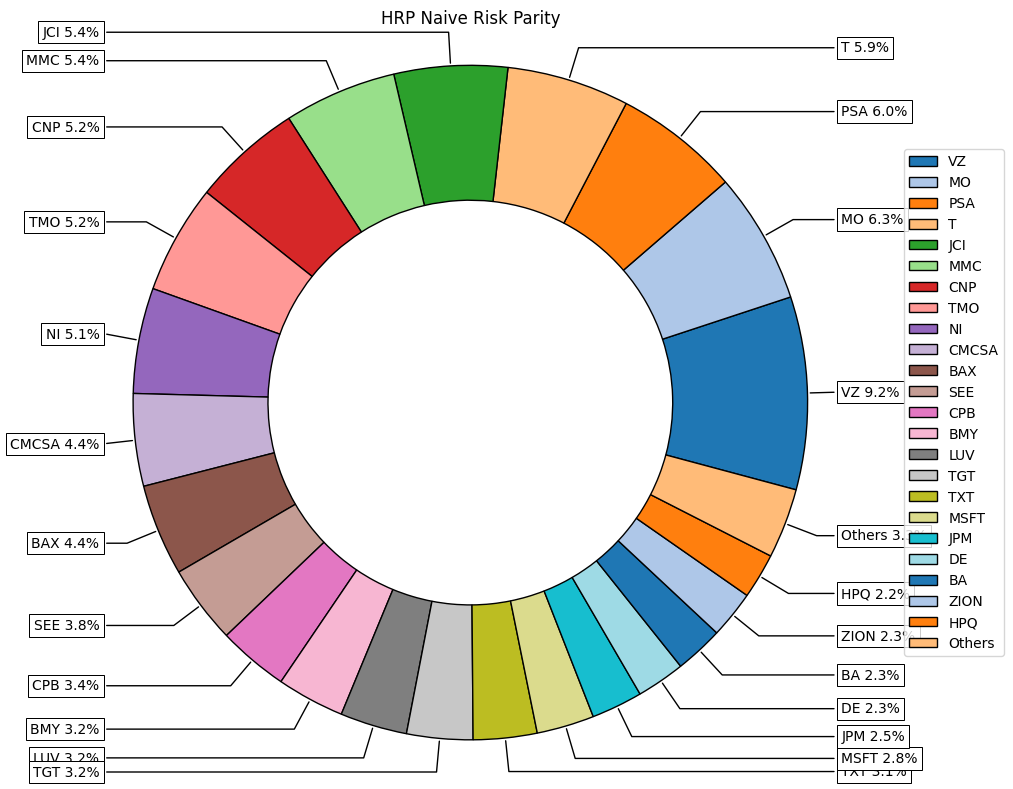

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

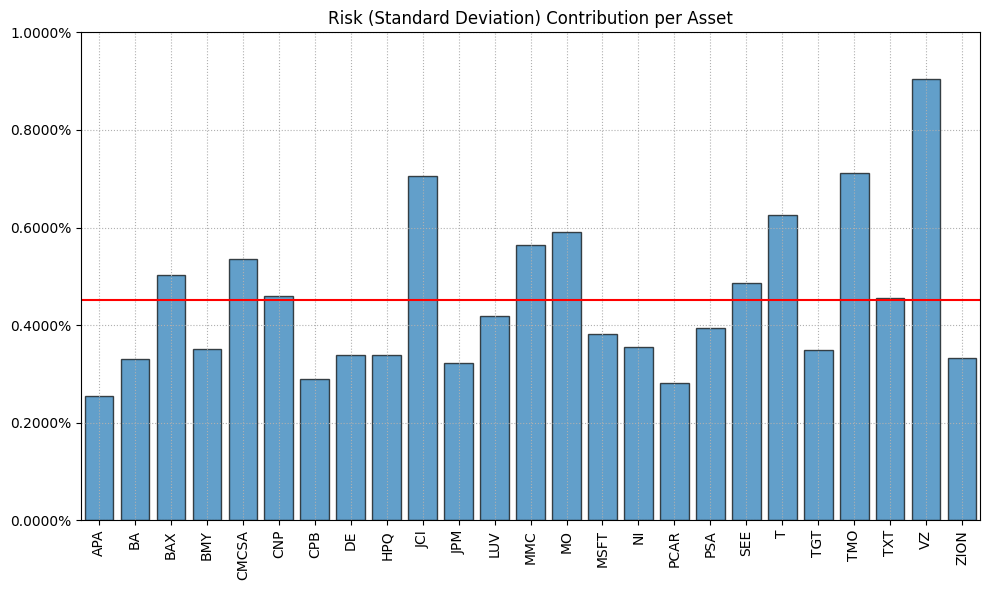

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### 2.4 Calculate Optimal HRP Portfolios for Several Risk Measures

In [7]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'GMD': Gini Mean Difference.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'TG': Tail Gini.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax).
# 'RG': Range of returns.
# 'CVRG': CVaR Range of returns.
# 'TGRG': Tail Gini Range of returns.
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'GMD', 'MSV', 'FLPM', 'SLPM', 'VaR',
       'CVaR', 'TG', 'EVaR', 'WR', 'RG', 'CVRG', 'TGRG', 'MDD', 
       'ADD', 'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel',
       'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [8]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,GMD,MSV,FLPM,SLPM,VaR,CVaR,TG,EVaR,WR,RG,CVRG,TGRG,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
APA,2.18%,1.45%,2.04%,2.09%,2.37%,1.89%,2.29%,2.22%,2.57%,2.66%,2.76%,2.96%,2.47%,2.27%,2.32%,1.58%,0.73%,0.98%,1.24%,1.39%,0.91%,1.84%,0.82%,1.19%,1.48%,1.63%,1.03%
BA,2.79%,2.32%,2.74%,2.74%,2.74%,2.86%,2.80%,2.67%,2.76%,2.81%,3.36%,3.95%,3.71%,2.74%,2.80%,2.98%,3.82%,3.44%,3.14%,3.15%,3.63%,3.12%,3.90%,3.60%,3.26%,3.25%,3.75%
BAX,3.75%,4.39%,3.80%,3.77%,3.61%,4.01%,3.70%,3.71%,3.58%,3.49%,3.73%,4.15%,4.13%,3.70%,3.72%,3.91%,5.94%,5.22%,4.99%,4.59%,5.63%,3.89%,5.91%,5.10%,4.92%,4.55%,5.62%
BMY,3.34%,3.24%,3.32%,3.33%,3.02%,3.13%,2.94%,3.17%,2.94%,2.91%,2.91%,2.77%,3.60%,3.32%,3.34%,2.51%,1.18%,2.08%,2.11%,2.23%,1.46%,2.53%,1.19%,2.08%,2.11%,2.22%,1.46%
CMCSA,3.82%,4.42%,3.75%,3.78%,3.77%,3.83%,3.80%,3.63%,3.76%,3.69%,3.56%,3.47%,4.25%,3.82%,3.82%,3.18%,3.25%,2.37%,2.67%,2.98%,2.90%,3.31%,3.41%,2.60%,2.91%,3.17%,3.08%
CNP,4.23%,5.24%,3.91%,4.01%,4.25%,3.94%,4.31%,3.84%,4.41%,4.56%,5.51%,5.74%,6.91%,4.37%,4.55%,6.13%,6.04%,5.19%,5.21%,5.50%,6.09%,6.15%,6.06%,5.14%,5.34%,5.56%,6.13%
CPB,3.38%,3.38%,3.44%,3.46%,3.56%,3.28%,3.49%,3.78%,3.73%,3.59%,2.89%,2.57%,2.52%,3.45%,3.32%,2.37%,1.03%,1.39%,1.67%,1.91%,1.27%,2.49%,1.08%,1.51%,1.84%,2.06%,1.34%
DE,2.79%,2.32%,2.83%,2.80%,2.83%,2.95%,2.89%,2.66%,2.83%,2.94%,3.73%,4.60%,3.30%,2.80%,2.82%,3.81%,5.02%,4.39%,3.91%,3.90%,4.77%,3.61%,4.88%,4.28%,3.88%,3.85%,4.66%
HPQ,2.64%,2.17%,2.77%,2.70%,2.56%,2.83%,2.59%,2.54%,2.48%,2.45%,2.31%,2.42%,2.44%,2.55%,2.57%,2.18%,2.59%,2.59%,2.67%,2.50%,2.56%,2.18%,2.55%,2.51%,2.60%,2.45%,2.49%
JCI,5.99%,5.43%,5.98%,6.03%,6.15%,5.96%,6.15%,5.84%,6.25%,6.24%,5.84%,5.52%,4.55%,6.09%,5.99%,4.53%,3.70%,4.26%,4.83%,4.87%,4.06%,4.44%,3.48%,4.09%,4.59%,4.67%,3.82%


<Axes: >

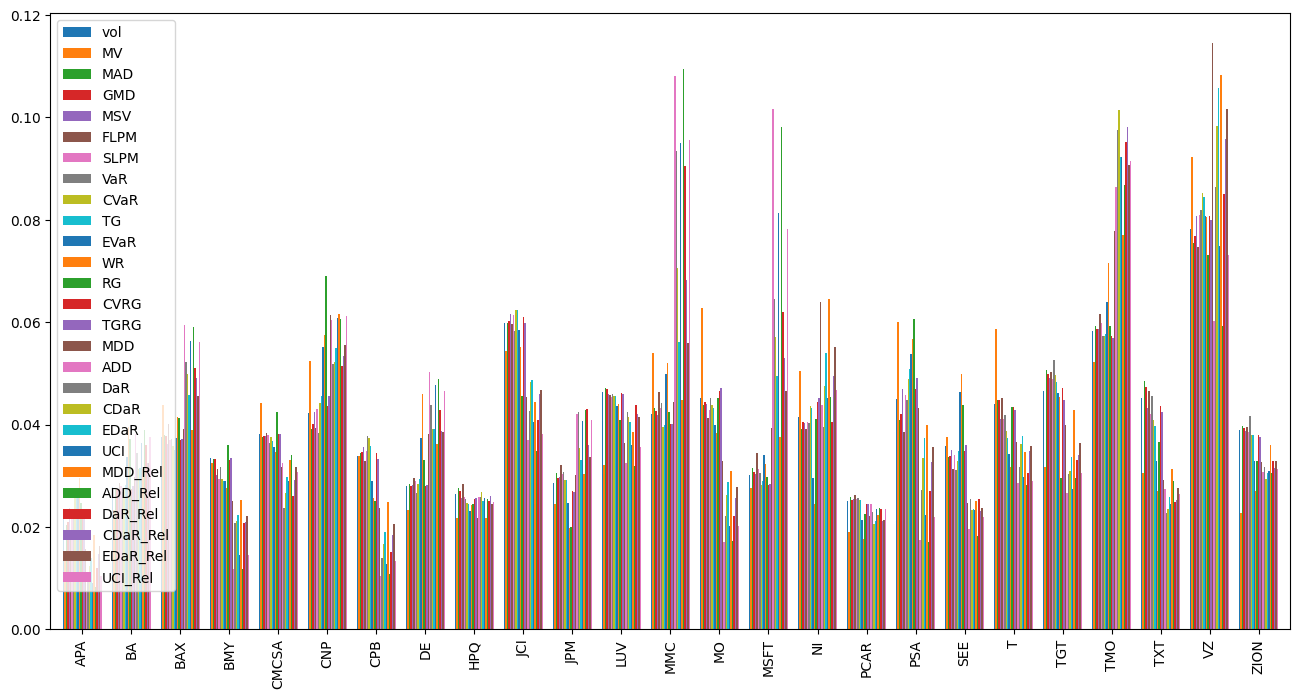

In [9]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot(kind='bar', width=0.8, ax=ax)